In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


In [109]:
train=pd.read_csv('/content/Train_data.csv')

In [110]:
test=pd.read_csv('/content/Test_data.csv')

In [111]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [112]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [114]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [116]:
train.shape

(25192, 42)

In [117]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [118]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()

    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [119]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

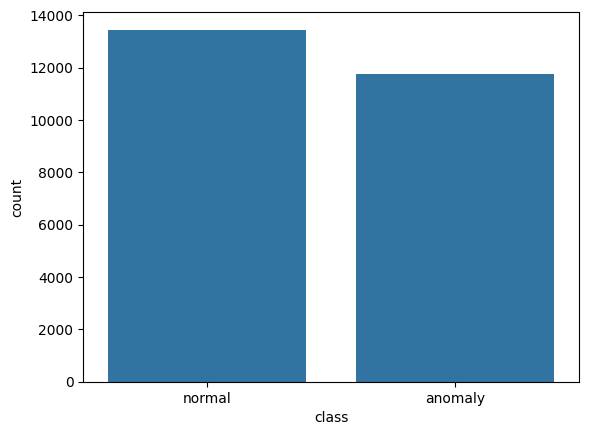

In [120]:
sns.countplot(x=train['class'])

In [121]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [122]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)


In [123]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [124]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [125]:
p=train['class'].value_counts()

print('1:Normal\n 0: Abnormal')
print(p)

1:Normal
 0: Abnormal
1    13449
0    11743
Name: class, dtype: int64


In [126]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [127]:
train['service'].value_counts()


22    8003
46    4351
11    1820
51    1449
19    1396
      ... 
60       4
47       3
42       3
58       2
24       1
Name: service, Length: 66, dtype: int64

In [133]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [134]:
from sklearn.decomposition import PCA

# Select the features you want to apply PCA on
useful_features = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

# Subset the DataFrame with only the selected features
X_selected = X_train[useful_features]

# Initialize PCA with the desired number of components
pca = PCA(n_components=10)

# Fit PCA to the selected features
X_selected_pca = pca.fit_transform(X_selected)

# Get the names of the original features that contribute the most to each principal component
selected_features = []
for i in range(X_selected_pca.shape[1]):
    component_index = useful_features[np.abs(pca.components_[i]).argsort()[-1]]
    selected_features.append(component_index)

# Print the selected features
print("Selected features:", selected_features)


Selected features: ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'dst_host_count', 'service', 'flag', 'srv_serror_rate', 'protocol_type', 'dst_host_same_src_port_rate']


In [135]:
X_train = X_train[selected_features]

In [136]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [171]:
x_train.shape

(17634, 10)

In [172]:
x_test.shape

(7558, 10)

In [173]:
y_train.shape

(17634,)

In [174]:
y_test.shape

(7558,)

In [177]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score

# Get the number of features from the shape of the training data
num_features = x_train.shape[1]

# Define the neural network model
model = Sequential()

# Add layers with increasing number of neurons
neurons = [16, 32, 64, 128]
for num_neurons in neurons:
    if num_neurons == neurons[0]:
        # First layer with input shape
        model.add(Dense(num_neurons, activation='relu', input_shape=(num_features,)))
    else:
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dropout(0.5))

# Add layers with decreasing number of neurons
neurons.reverse()
for num_neurons in neurons:
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])

model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)

# Make predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)





Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 16)                176       
                                                                 
 dropout_111 (Dropout)       (None, 16)                0         
                                                                 
 dense_127 (Dense)           (None, 32)                544       
                                                                 
 dropout_112 (Dropout)       (None, 32)                0         
                                                                 
 dense_128 (Dense)           (None, 64)                2112      
                                                                 
 dropout_113 (Dropout)       (None, 64)                0         
                                                                 
 dense_129 (Dense)           (None, 128)             

Epoch 1/10
441/441 [==============================] - 3s 8ms/step - loss: 0.1853 - accuracy: 0.9492 - precision_2: 0.9438 - val_loss: 0.1922 - val_accuracy: 0.9067 - val_precision_2: 0.8570
Epoch 2/10
441/441 [==============================] - 2s 5ms/step - loss: 0.1907 - accuracy: 0.9472 - precision_2: 0.9405 - val_loss: 0.1889 - val_accuracy: 0.9181 - val_precision_2: 0.8740
Epoch 3/10
441/441 [==============================] - 3s 6ms/step - loss: 0.1835 - accuracy: 0.9463 - precision_2: 0.9416 - val_loss: 0.1955 - val_accuracy: 0.9067 - val_precision_2: 0.8567
Epoch 4/10
441/441 [==============================] - 2s 5ms/step - loss: 0.1839 - accuracy: 0.9492 - precision_2: 0.9425 - val_loss: 0.1885 - val_accuracy: 0.9269 - val_precision_2: 0.8886
Epoch 5/10
441/441 [==============================] - 2s 5ms/step - loss: 0.1773 - accuracy: 0.9511 - precision_2: 0.9476 - val_loss: 0.1768 - val_accuracy: 0.9308 - val_precision_2: 0.8938
Epoch 6/10
441/441 [==============================

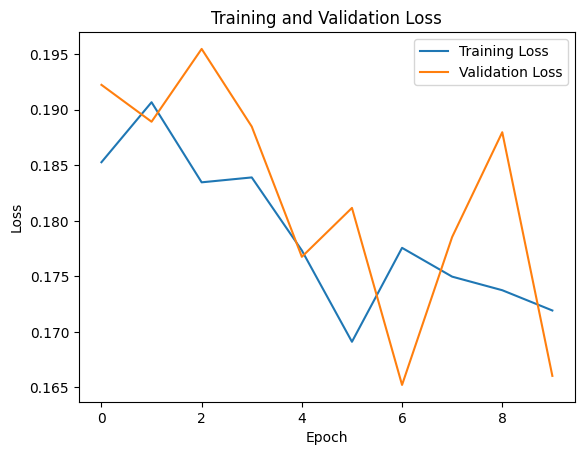

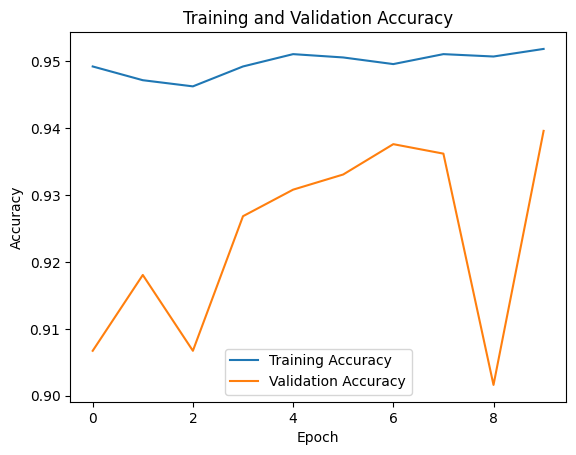

In [178]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [149]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.metrics import accuracy_score

# # Get the number of features from the shape of the training data
# num_features = x_train.shape[1]

# # Define the neural network model
# model = Sequential()

# # Add layers with increasing number of neurons
# for num_neurons in range(8, 513, 64):
#     if num_neurons == 8:
#         # First layer with input shape
#         model.add(Dense(num_neurons, activation='relu', input_shape=(num_features,)))
#     else:
#         model.add(Dense(num_neurons, activation='relu'))
#     model.add(Dropout(0.5))

# # Add layers with decreasing number of neurons
# for num_neurons in range(448, 7, -64):
#     model.add(Dense(num_neurons, activation='relu'))
#     model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 8)                 88        
                                                                 
 dropout_32 (Dropout)        (None, 8)                 0         
                                                                 
 dense_39 (Dense)            (None, 72)                648       
                                                                 
 dropout_33 (Dropout)        (None, 72)                0         
                                                                 
 dense_40 (Dense)            (None, 136)               9928      
                                                                 
 dropout_34 (Dropout)        (None, 136)               0         
                                                                 
 dense_41 (Dense)            (None, 200)              

In [ ]:
# # Train the model
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_accuracy)

# # Make predictions
# y_pred_prob = model.predict(x_test)
# y_pred = (y_pred_prob > 0.5).astype(int)

In [147]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.metrics import accuracy_score

# # Get the number of features from the shape of the training data
# num_features = x_train.shape[1]

# # Define the neural network model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(num_features,)),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_accuracy)

# # Make predictions
# # Make predictions
# y_pred_prob = model.predict(x_test)
# y_pred = (y_pred_prob > 0.5).astype(int)



In [145]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report

# # Instantiate XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Train the model
# xgb_model.fit(x_train, y_train)

# # Make predictions on the test data
# y_pred = xgb_model.predict(x_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Additional evaluation metrics
# print(classification_report(y_test, y_pred))
